# Features Engineering for Household Power Consumption Data
![image](https://th.bing.com/th?id=OIF.L4s770oov%2fI1qxVfqg6NKg&pid=ImgDet&rs=1)

## **Attribute Information:**                                                        
> **1.date: Date in format dd/mm/yyyy**

> **2.time: time in format hh:mm:ss**

> **3.global_active_power: household global minute-averaged active power (in kilowatt)**                                                                   
> **4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)**                                                                     
> **5.voltage: minute-averaged voltage (in volt)**    

> **6.global_intensity: household global minute-averaged current intensity (in ampere).**                                                                       
> **7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).**

> **8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.**

> **9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.**                  

In [ ]:
Agenda = {
    1:"Importing what we want",
    2:"Loading our data",
    3:"Looking at the data and fixing some problems",
    4:"Missing values",
    5:"Distribute some columns",
    6:"Feature Selection",
    7:"Feature extraction",
    8:"Dimension Reduction"
}

Agenda

{1: 'Importing what we want',
 2: 'Loading our data',
 3: 'Looking at the data and fixing some problems',
 4: 'Minssing values',
 5: 'Distribute some columns',
 6: 'Feature Selection',
 7: 'Feature extraction',
 8: 'Dimension Reduction'}

## 1. Importing what we want 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix

# ignore the warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Loading our data

In [ ]:
data = pd.read_csv("Household Power Consumption.txt", sep = ";")
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
data.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
185706,24/4/2007,16:30:00,0.320,0.082,235.190,1.600,0.000,2.000,0.0
185707,24/4/2007,16:31:00,0.328,0.078,234.530,1.600,0.000,1.000,0.0
185708,24/4/2007,16:32:00,0.344,0.088,234.900,1.800,0.000,1.000,0.0
185709,24/4/2007,16:33:00,0.416,0.174,235.290,2.000,0.000,1.000,0.0
185710,24/4/2007,16:34:00,0.408,0.174,234.820,2.000,0.000,1.000,0.0


In [ ]:
shape_pefore = data.shape
shape_pefore #(Number of rows ,Number of columns)

(185711, 9)

## 3. Looking at the data and fixing some problems

In [ ]:
columns = data.columns

In [ ]:
list(columns)

['Date',
 'Time',
 'Global_active_power',
 'Global_reactive_power',
 'Voltage',
 'Global_intensity',
 'Sub_metering_1',
 'Sub_metering_2',
 'Sub_metering_3']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185711 entries, 0 to 185710
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   185711 non-null  object 
 1   Time                   185711 non-null  object 
 2   Global_active_power    185711 non-null  object 
 3   Global_reactive_power  185711 non-null  object 
 4   Voltage                185711 non-null  object 
 5   Global_intensity       185711 non-null  object 
 6   Sub_metering_1         185711 non-null  object 
 7   Sub_metering_2         185711 non-null  object 
 8   Sub_metering_3         185702 non-null  float64
dtypes: float64(1), object(8)
memory usage: 12.8+ MB


**The values of many columns is float not object so I will fix this problem**

In [ ]:
# I want to get to that point
data_type_dic = {
    "Date":object,
    "Time":object,
    "Global_active_power":float,
    "Global_reactive_power":float,
    "Voltag":float,
    "Global_intensity":float,
    "Sub_metering_1":float,
    "Sub_metering_2":float,
    "Sub_metering_3":float
}
data_type_dic

{'Date': object,
 'Time': object,
 'Global_active_power': float,
 'Global_reactive_power': float,
 'Voltag': float,
 'Global_intensity': float,
 'Sub_metering_1': float,
 'Sub_metering_2': float,
 'Sub_metering_3': float}

In [ ]:
"?" in data.values

True

In [ ]:
"  " in data.values

True

In [ ]:
# "?"
data = data.replace("?" , np.nan)
# " "
data = data.replace(" " , np.nan)
# "  "
data = data.replace("  " , np.nan)
# "   "
data = data.replace("   ", np.nan)

In [ ]:
# Global_active_power
data[["Global_active_power"]] = data[["Global_active_power"]].apply(pd.to_numeric)
# Global_reactive_power
data[["Global_reactive_power"]] = data[["Global_reactive_power"]].apply(pd.to_numeric)
# Voltage
data[["Voltage"]] = data[["Voltage"]].apply(pd.to_numeric)
# Global_intensity
data[["Global_intensity"]] = data[["Global_intensity"]].apply(pd.to_numeric)
# Sub_metering_1
data[["Sub_metering_1"]] = data[["Sub_metering_1"]].apply(pd.to_numeric)
# Sub_metering_2
data[["Sub_metering_2"]] = data[["Sub_metering_2"]].apply(pd.to_numeric)
# Sub_metering_3
data[["Sub_metering_3"]] = data[["Sub_metering_3"]].apply(pd.to_numeric)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185711 entries, 0 to 185710
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   185711 non-null  object 
 1   Time                   185711 non-null  object 
 2   Global_active_power    185701 non-null  float64
 3   Global_reactive_power  185702 non-null  float64
 4   Voltage                185701 non-null  float64
 5   Global_intensity       185700 non-null  float64
 6   Sub_metering_1         185702 non-null  float64
 7   Sub_metering_2         185702 non-null  float64
 8   Sub_metering_3         185702 non-null  float64
dtypes: float64(7), object(2)
memory usage: 12.8+ MB


## 4. Missing values

In [ ]:
data.isnull().sum()

Date                      0
Time                      0
Global_active_power      10
Global_reactive_power     9
Voltage                  10
Global_intensity         11
Sub_metering_1            9
Sub_metering_2            9
Sub_metering_3            9
dtype: int64

In [ ]:
# drop rows iin data with null values
data = data.dropna(axis = 0, subset = ['Global_active_power',
                                       'Global_reactive_power', 
                                       'Voltage', 'Global_intensity',
                                       'Sub_metering_1',
                                       'Sub_metering_2',
                                       'Sub_metering_3'])

In [ ]:
# there is no missing data
data.isnull().sum().any()

False

In [ ]:
shape_after = data.shape
shape_after

(185698, 9)

In [ ]:
print(f"Let's remmember the first shape")
print(f"The shape of data pefore removing null is: {shape_pefore}")
print(f"The shape of data after removing null is: {shape_after}")
print(f"The totla removed rows are: {shape_pefore[0] - shape_after[0]}")

Let's remmember the first shape
The shape of data pefore removing null is: (185711, 9)
The shape of data after removing null is: (185698, 9)
The totla removed rows are: 13


In [ ]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,185698.000000,185698.000000,185698.000000,185698.000000,185698.000000,185698.000000,185698.000000
mean,1.382524,0.121660,240.642070,5.852491,1.232587,1.783703,6.553382
std,1.293249,0.112603,3.168402,5.456027,6.498817,7.163079,8.468975
min,0.104000,0.000000,223.490000,0.600000,0.000000,0.000000,0.000000
25%,0.318000,0.000000,238.700000,1.400000,0.000000,0.000000,0.000000
50%,1.218000,0.106000,240.820000,5.200000,0.000000,0.000000,0.000000
75%,2.062000,0.190000,242.770000,8.600000,0.000000,1.000000,17.000000
max,10.670000,0.874000,251.700000,46.400000,77.000000,78.000000,20.000000


#**visualize the relationship among the features**

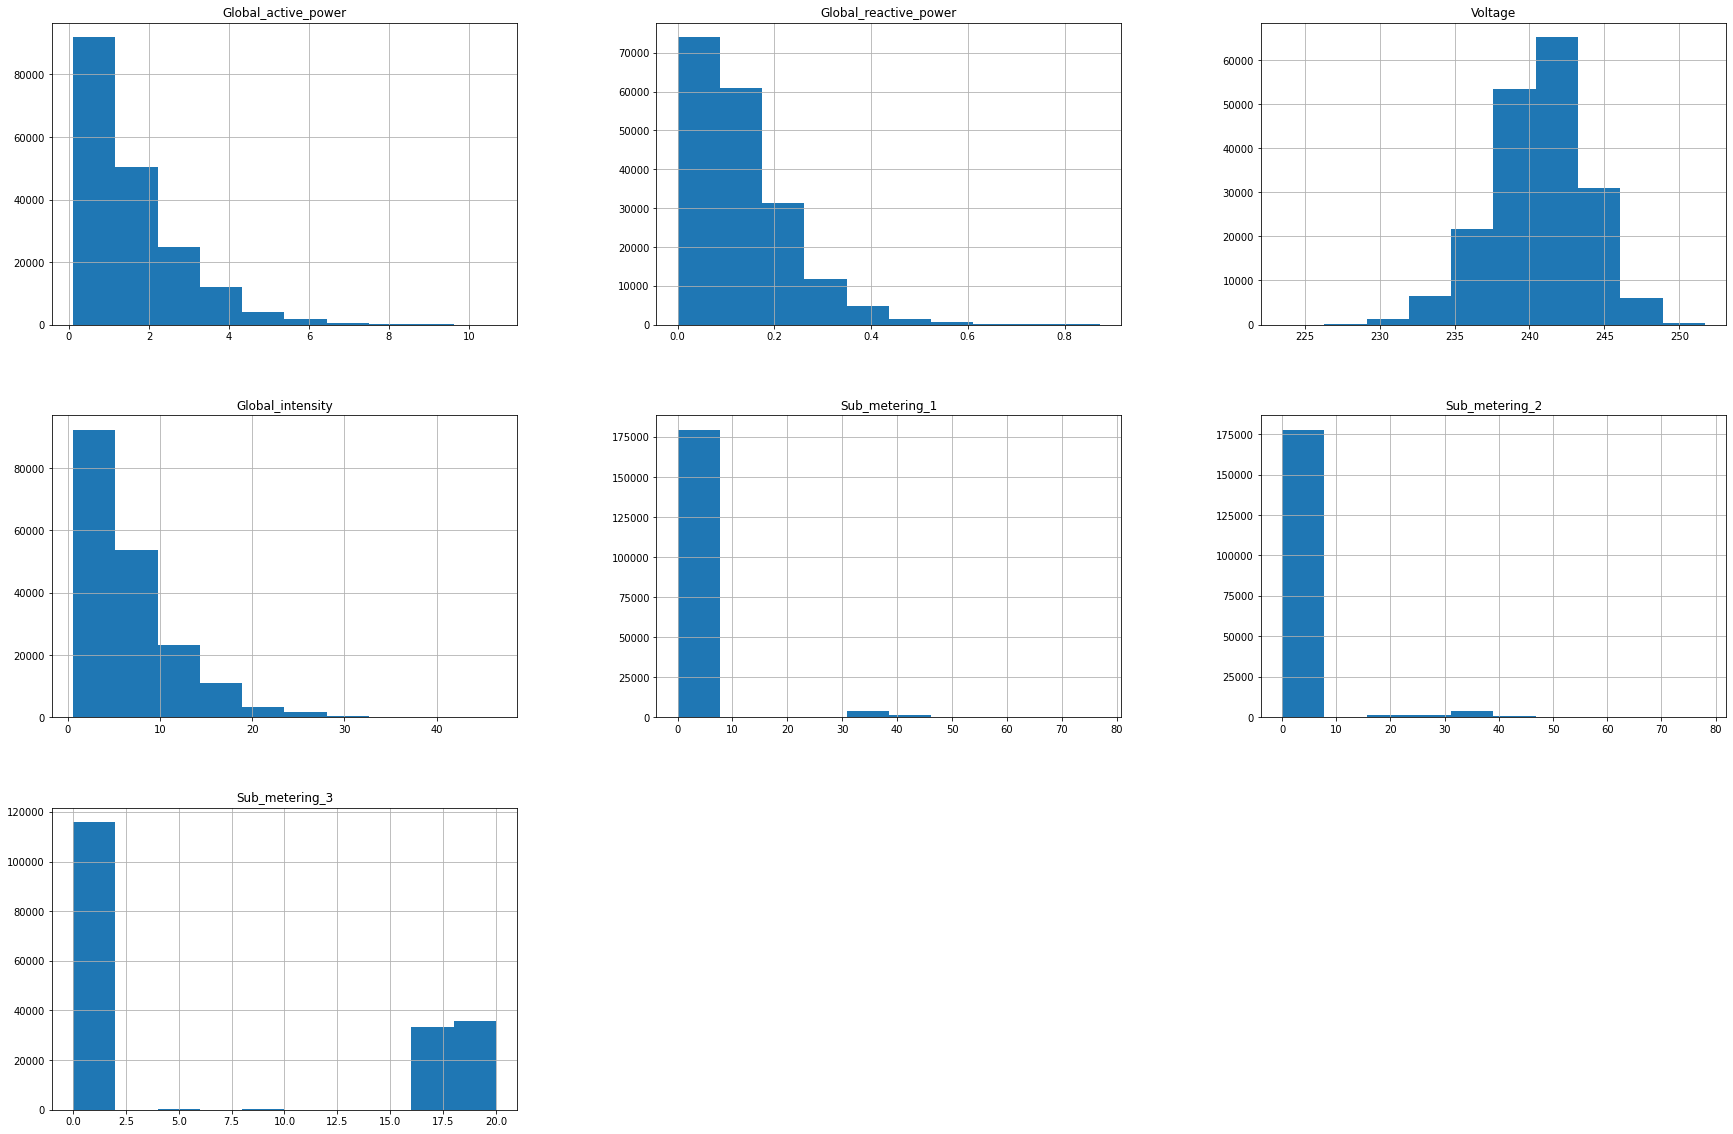

In [ ]:
data.hist(figsize = (30,20));

_Global_active_power && Global_reactive_power && Global_intensity is Right Skewed Histogram (Mean > Median > Mode)= the frequency of observation lies to the left is the highest and most of the observations or data points lie to the right of the graph) _Voltage is normally distributed

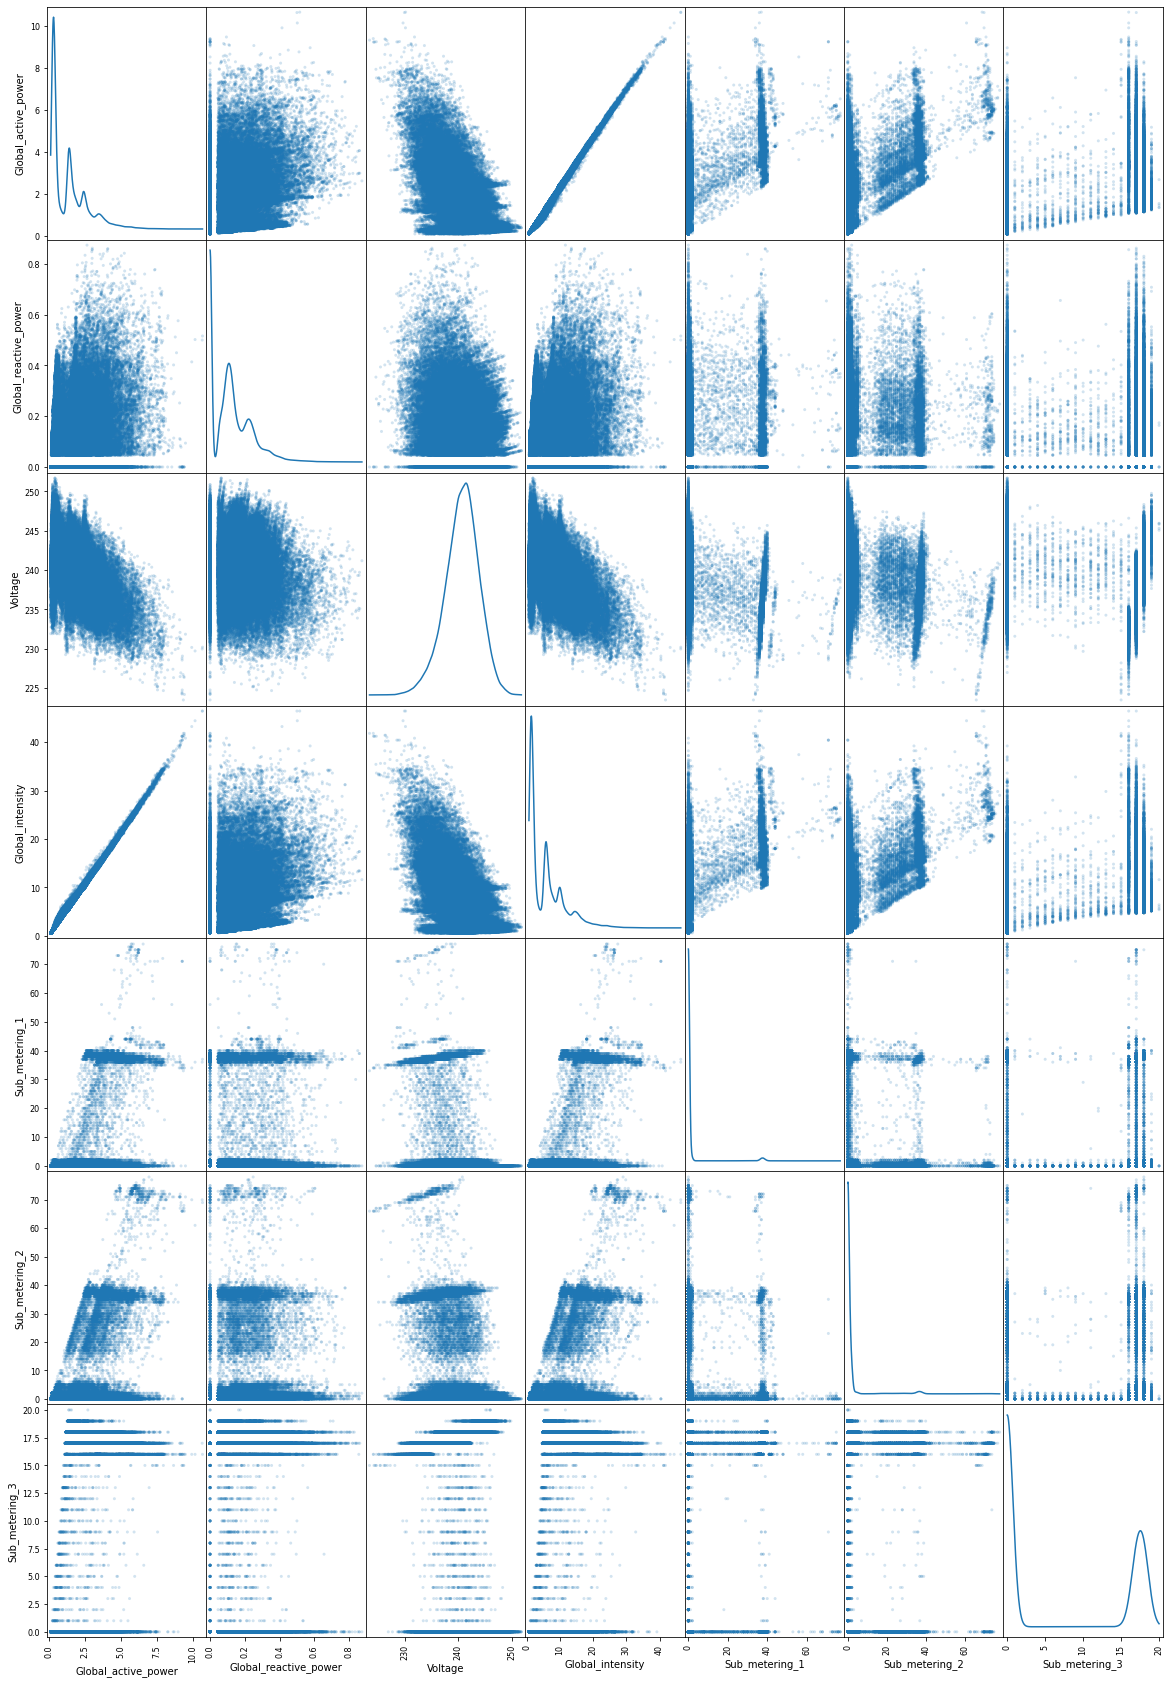

In [ ]:

scatter_matrix(data, alpha = 0.2, figsize = (20, 30), diagonal = 'kde');


## 5. Distribute some columns

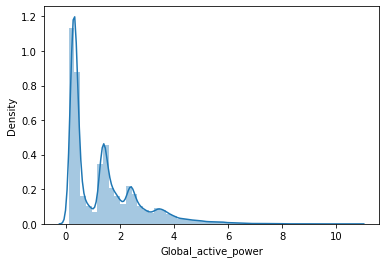

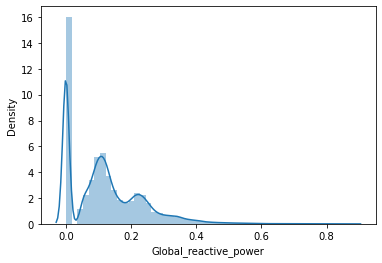

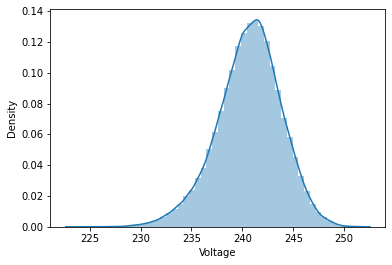

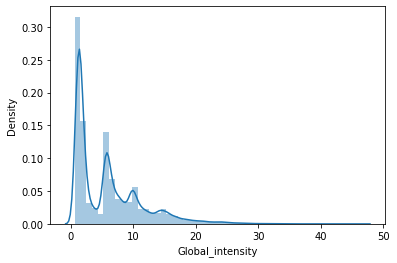

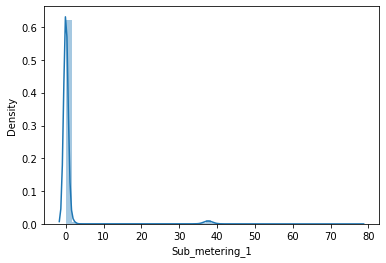

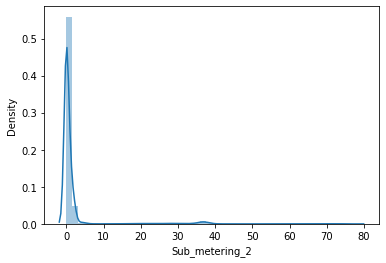

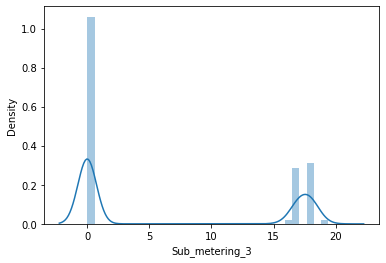

In [ ]:
for i, col in enumerate(data[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]):
    plt.figure(i)
    plot = sns.distplot(data[col])
    # Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3' is alomst = 0 

## 6. Feature Selection

## 6.1 Feature Correlation

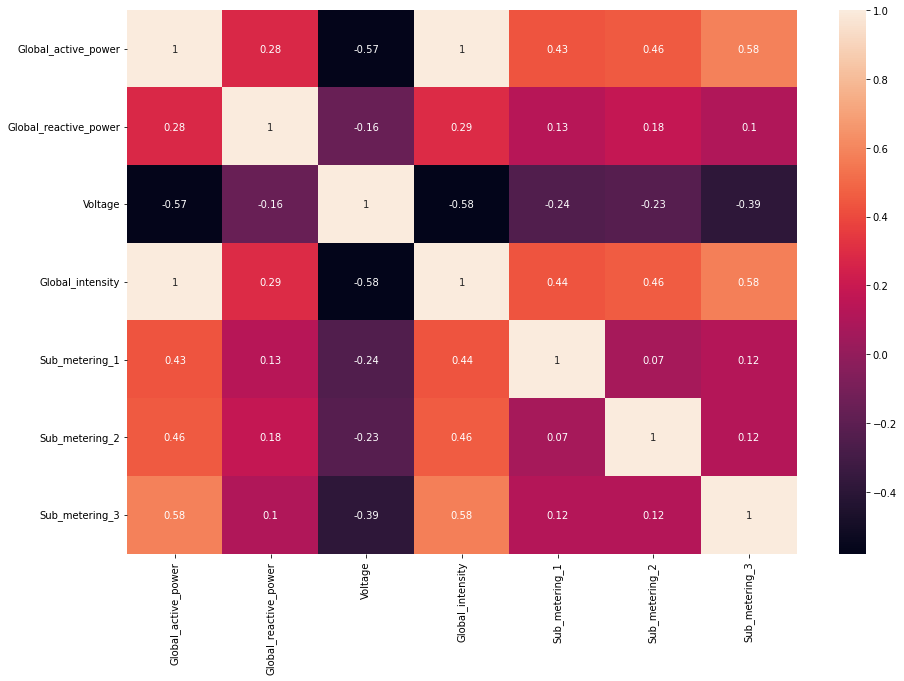

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(data[["Global_active_power","Global_reactive_power","Voltage","Global_intensity","Sub_metering_1","Sub_metering_2","Sub_metering_3"]].corr(), annot = True)

**It seems that the Voltage column is the least connected to the data, and therefore it is possible to get rid of it, so as not to cause confusion on the neural network that we will build in another stage later.**

In [ ]:
data = data.drop("Voltage", axis = 1)

In [ ]:
"Voltage" in data.columns

False

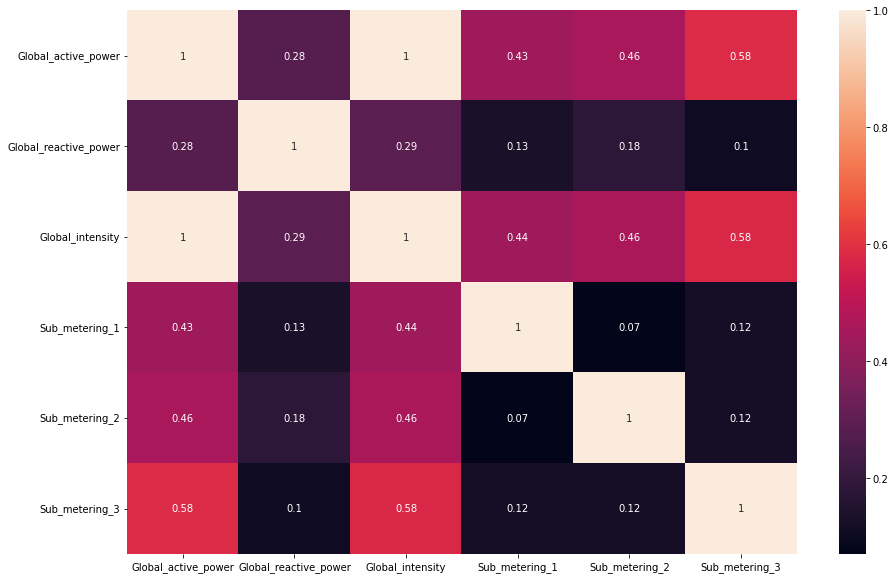

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(data[["Global_active_power","Global_reactive_power","Global_intensity","Sub_metering_1","Sub_metering_2","Sub_metering_3"]].corr(), annot = True)

## 7. Feature extraction

In [ ]:
data["Date"].value_counts()

18/2/2007     1440
5/3/2007      1440
19/3/2007     1440
18/3/2007     1440
16/3/2007     1440
              ... 
21/12/2006    1438
22/2/2007     1437
24/4/2007      994
16/12/2006     395
8                1
Name: Date, Length: 131, dtype: int64

In [ ]:
# this is inconsistant data so i must remove it
# here i show the spacific row
data[data["Date"] == "8"]

,Date,Time,Global_active_power,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
49855,8,08:19:00,2.984,0.086,12.6,0.0,0.0,0.0


In [ ]:
# here I remove it 
data = data[data.Date != "8"]

In [ ]:
data[data["Date"] == "8"]

,Date,Time,Global_active_power,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3


In [ ]:
# day column
def day(x):
    return x.split("/")[0]

# month column
def month(x):
    return x.split("/")[1]

# year column
def year(x):
    return x.split("/")[2]

In [ ]:
data['Day'] = data['Date'].apply(day)
data['Month'] = data['Date'].apply(month)
data['Year'] = data['Date'].apply(year)

In [ ]:
data["Date"]=pd.to_datetime(data[['Year','Month','Day']],errors='coerce')

In [ ]:
# hours column
def hour(x):
    return x.split(":")[0]

# miutes column
def minute(x):
    return x.split(":")[1]

In [ ]:
data["Time"].value_counts()

17:24:00    129
08:46:00    129
08:54:00    129
08:53:00    129
08:52:00    129
           ... 
16:48:00    128
16:49:00    128
16:50:00    128
17:30:00    128
17:13:00    127
Name: Time, Length: 1440, dtype: int64

In [ ]:
data["Hour"] = data["Time"].apply(hour)
data["Minute"] = data["Time"].apply(minute)

In [ ]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day,Month,Year,Hour,Minute
0,2006-12-16,17:24:00,4.216,0.418,18.4,0.0,1.0,17.0,16,12,2006,17,24
1,2006-12-16,17:25:00,5.360,0.436,23.0,0.0,1.0,16.0,16,12,2006,17,25
2,2006-12-16,17:26:00,5.374,0.498,23.0,0.0,2.0,17.0,16,12,2006,17,26
3,2006-12-16,17:27:00,5.388,0.502,23.0,0.0,1.0,17.0,16,12,2006,17,27
4,2006-12-16,17:28:00,3.666,0.528,15.8,0.0,1.0,17.0,16,12,2006,17,28


In [ ]:
data["Hour"].value_counts()

05    7740
02    7740
13    7740
12    7740
09    7740
07    7740
06    7740
15    7740
03    7740
04    7740
01    7740
00    7740
23    7740
20    7740
14    7740
18    7739
08    7739
21    7739
19    7739
22    7738
10    7738
11    7738
16    7714
17    7713
Name: Hour, dtype: int64

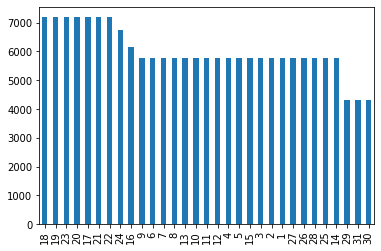

In [ ]:
data["Day"].value_counts().plot.bar()

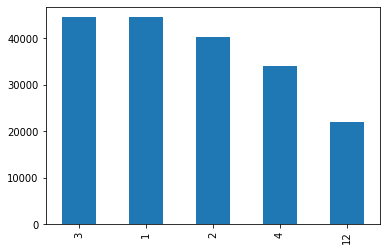

In [ ]:
data["Month"].value_counts().plot.bar()

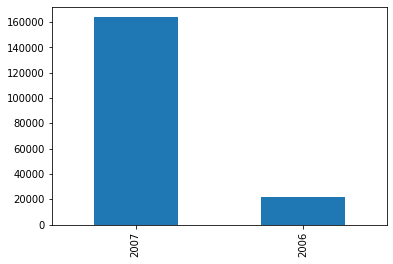

In [ ]:
data["Year"].value_counts().plot.bar()

**The data in front of us works according to the 24-hour system, but we need to convert it to the 12-hour system, i.e. night and morning, because this helps us in the analysis**

In [ ]:
# dividing the 24 hours into 12 hour 
# 0 refer into morning 
# 1 refer into night

def hour_quarter(x):
    if x <= '12':
        return 0
    else:
        return 1

In [ ]:
data["Hour_Quarter"] = data["Hour"].apply(hour_quarter)

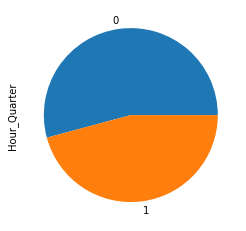

In [ ]:
data["Hour_Quarter"].value_counts().plot.pie()

In [ ]:
# converting some data types from object  into numeric type

# Day
data[["Day"]] = data[["Day"]].apply(pd.to_numeric)
# Month
data[["Month"]] = data[["Month"]].apply(pd.to_numeric)
# Year
data[["Year"]] = data[["Year"]].apply(pd.to_numeric)
# Minute
data[["Minute"]] = data[["Minute"]].apply(pd.to_numeric)
# Hour_Quarter
data[["Hour_Quarter"]] = data[["Hour_Quarter"]].apply(pd.to_numeric)
# Hour
data[["Hour"]] = data[["Hour"]].apply(pd.to_numeric)

In [ ]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day,Month,Year,Hour,Minute,Hour_Quarter
0,2006-12-16,17:24:00,4.216,0.418,18.4,0.0,1.0,17.0,16,12,2006,17,24,1
1,2006-12-16,17:25:00,5.360,0.436,23.0,0.0,1.0,16.0,16,12,2006,17,25,1
2,2006-12-16,17:26:00,5.374,0.498,23.0,0.0,2.0,17.0,16,12,2006,17,26,1
3,2006-12-16,17:27:00,5.388,0.502,23.0,0.0,1.0,17.0,16,12,2006,17,27,1
4,2006-12-16,17:28:00,3.666,0.528,15.8,0.0,1.0,17.0,16,12,2006,17,28,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185697 entries, 0 to 185710
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Date                   185697 non-null  datetime64[ns]
 1   Time                   185697 non-null  object        
 2   Global_active_power    185697 non-null  float64       
 3   Global_reactive_power  185697 non-null  float64       
 4   Global_intensity       185697 non-null  float64       
 5   Sub_metering_1         185697 non-null  float64       
 6   Sub_metering_2         185697 non-null  float64       
 7   Sub_metering_3         185697 non-null  float64       
 8   Day                    185697 non-null  int64         
 9   Month                  185697 non-null  int64         
 10  Year                   185697 non-null  int64         
 11  Hour                   185697 non-null  int64         
 12  Minute                 185697 non-null  int6

In [ ]:
data.to_csv("final version.csv")

## 8. Dimension Reduction

**Now I will get rid of two columns, namely, the date and time. They played a key role in the process of data analysis, and it was possible for us to delve deeper into the data analysis to answer some questions. These two columns will be among the most influential columns in data analysis.**

**But in that case I will delete them now in order to implement one of the concepts of dimension reduction.**

In [ ]:
data = data.drop(["Date","Time"],axis=1)

In [ ]:
pca = PCA(n_components=3, svd_solver='full')
data = pca.fit_transform(data)
print('PCAModel Explained Variance ratio is : ' , pca.explained_variance_ratio_)
print('PCAModel singular value is : ' , pca.singular_values_)
print('PCAModel mean is : ' , pca.mean_)

PCAModel Explained Variance ratio is :  [0.47656011 0.16130766 0.11877586]
PCAModel singular value is :  [7462.70893532 4341.75343097 3725.64739639]
PCAModel mean is :  [1.38251564e+00 1.21659833e-01 5.85245427e+00 1.23259396e+00
 1.78371218e+00 6.55341766e+00 1.59338277e+01 3.55166212e+00
 2.00688158e+03 1.14983710e+01 2.95000727e+01 4.58176492e-01]


**Now the data processing step begins in order to build a machine learning algorithm, or an artificial neural network.**